<h3 align="center">Machine Learning</h3>
<h4 align="center">DSECLZ G565</h4>
<h4 align="center">Assignment 2 – PS3</h4>

## Group 108

- REDDYVARI SASI KUMAR REDDY - 2021FC04030  
- DHRUBA ADHIKARY - 2021FC04034
- MOHD SAIF ALI - 2021fC04026

## Dataset : 
Order Master Dataset

## Problem Statement:
Order Master Dataset to predict if order cancellation will happen or not

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Introduction to Random Forest algorithm](#1)
2.	[Random Forest algorithm intuition](#2)
3.	[Types of Ensembling Techniques](#3)
4.	[Applications of Random Forest algorithm](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Declare feature vector and target variable](#8)
9.	[Split data into separate training and test set](#9)
10.	[Feature engineering](#10)
11.	[Feature scaling](#11)
12.	[Model training](#12)
13.	[Predict the results](#13)
14.	[Check accuracy score](#14)
15.	[Confusion matrix](#15)
16.	[Classification metrices](#16)
17.	[Calculate class probabilities](#17)
18.	[ROC - AUC](#18)
19.	[k-Fold Cross Validation](#19)



# **1. Introduction to Random Forest algorithm** <a class="anchor" id="1"></a>


In machine learning, Random Forest classification is a straightforward and powerful algorithm for the classification task.It is a supervised Machine learning algorithm.Random Forest classification is an Ensembling Technique. In Layman Terms, it is a technique similar to consider if planning to buy a phone, the highest rating is considered as the best. In similar terms, a collection of decision trees is trained and the mean or highest count is considered as the prediction.

Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

# **2. Random Forest algorithm intuition** <a class="anchor" id="2"></a>

Random Forest Classifier tries to find the Gini index of all the splits possible and will choose that feature for the root node which will give the lowest Gini index. The lowest Gini index means low impurity.

When trained using one decision trees with a sample of the dataset, it performs good with the trained dataset. Thus shows low bias but high Variance. To encounter this, random forest uses various decision trees and it is trained as a hyper parameter. Thus acheiving Low bias and Low Variance.

# **3. Types of Ensembling Techniques** <a class="anchor" id="3"></a>


There are 2 types of Ensembling Techniques. The 2 types are listed below:-

  1. Bagging  : Parallel Way of training

  2. Boosting : Serial Way of training


# **4. Applications of Random Forest algorithm** <a class="anchor" id="4"></a>


Random Forest is suitable to use in both Regression and Classification.

1. Fraud Detection
2. Customer Segmentation
3. Disease Prediction
4. Recommender systems

# **5. Import libraries** <a class="anchor" id="5"></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import missingno

In [7]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>


In [4]:
# Mounting the Google Drive
from google.colab import drive

In [88]:
!ls

drive  sample_data


In [89]:
dataset_path="/content/drive/MyDrive/ORDER_MASTER.csv"

In [8]:
# Load the dataset
data = dataset_path
df = pd.read_csv(data, header=0, sep=',')

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>




In [9]:
df.shape

(9962620, 26)

In [11]:
# A sample of data
df = df.iloc[:1048575,:]
df.shape

(1048575, 26)

Observation: We can see that there are 1048575 instances and 26 attributes in the data set.

In [92]:
df.head(2)

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,cncl_dt,dmd_dol,...,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,City_shipped,State_Shipped,Cntry_Shipped
0,7513817.0,19147551.0,11-04-2019 17:22,D,S,WEB,0.0,0.0,NaN,489.58,...,9558428,969,76,4,0.0,0.0,F,PORTLAND,OR,US
1,9009772.0,22402482.0,01-12-2019 14:42,D,S,MOB,0.0,0.0,NaN,559.86,...,1121512,903,47,4,0.0,0.0,F,Boise,ID,US


In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ord_num,1048575.0,NaN,NaN,NaN,9643747.367425,13005031.974024,5147399.0,6542261.5,7856865.0,9161640.5,100060681.0
ord_lin_no,1048575.0,NaN,NaN,NaN,19394614.608157,4229960.137069,1.0,16837933.5,19671338.0,22524841.0,25400900.0
ord_dt,1048575,490152,2020-06-28 11:03:46,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ord_line_status,1048575,12,D,798577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ord_hdr_status,1027553,2,S,997488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ord_type,1048575,3,WEB,723200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cncl_dol,1048574.0,NaN,NaN,NaN,6.592378,63.750596,0.0,0.0,0.0,0.0,28680.0
rtn_dol,1048324.0,NaN,NaN,NaN,22.744797,83.466135,0.0,0.0,0.0,0.0,13600.0
cncl_dt,55349,887,2018-11-29 00:00:00,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dmd_dol,1048574.0,NaN,NaN,NaN,1335.774641,1985.806539,0.0,448.0,839.86,1511.86,401520.0


In [94]:
df.columns

Index(['ord_num', 'ord_lin_no', 'ord_dt', 'ord_line_status', 'ord_hdr_status',
       'ord_type', 'cncl_dol', 'rtn_dol', 'cncl_dt', 'dmd_dol', 'dmd_units',
       'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind', 'Shp_Date', 'rtn_dt', 'skn_nbr',
       'Subcat_ID', 'Cat_ID', 'Dept_id', 'RTN_UNITS', 'cncl_units',
       'international_order_ind', 'City_shipped', 'State_Shipped',
       'Cntry_Shipped'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ord_num                  1048575 non-null  float64
 1   ord_lin_no               1048575 non-null  float64
 2   ord_dt                   1048575 non-null  object 
 3   ord_line_status          1048575 non-null  object 
 4   ord_hdr_status           1027553 non-null  object 
 5   ord_type                 1048575 non-null  object 
 6   cncl_dol                 1048574 non-null  float64
 7   rtn_dol                  1048324 non-null  float64
 8   cncl_dt                  55349 non-null    object 
 9   dmd_dol                  1048574 non-null  float64
 10  dmd_units                1048149 non-null  float64
 11  Loyalty_Ind              1048575 non-null  int64  
 12  Emp_Ind                  1048575 non-null  int64  
 13  Fship_Ind                1048575 non-null 

### Data Cleaning

In [224]:
#Convert Datetime based columns into Tangible Data columns of Numeric type 
# Take Time Delta to find No of days elapsed between Order placed to Shippment 
#And Return within certain window

In [96]:
df[['ord_dt','Shp_Date','rtn_dt','cncl_dt']]=df[['ord_dt','Shp_Date','rtn_dt','cncl_dt']].apply(pd.to_datetime)
df['ord_shp']=(df['Shp_Date']-df['ord_dt']).dt.days.abs()

df['ord_cncl']=(df['cncl_dt']-df['ord_dt']).dt.days.abs()
df['shp_ret']=(df['rtn_dt']-df['Shp_Date']).dt.days.abs()

In [97]:
#now drop all date columns as we have the info captured as Order to Shipped time in days 
#Ordered to cancellation Info in days 
#Shipped to returned in days 
df.drop(['ord_dt','Shp_Date','rtn_dt','cncl_dt'],axis=1,inplace=True)

In [98]:
#Drop Index column 
df.drop(['ord_lin_no'],axis=1,inplace=True)
df.columns.tolist()

['ord_num',
 'ord_line_status',
 'ord_hdr_status',
 'ord_type',
 'cncl_dol',
 'rtn_dol',
 'dmd_dol',
 'dmd_units',
 'Loyalty_Ind',
 'Emp_Ind',
 'Fship_Ind',
 'skn_nbr',
 'Subcat_ID',
 'Cat_ID',
 'Dept_id',
 'RTN_UNITS',
 'cncl_units',
 'international_order_ind',
 'City_shipped',
 'State_Shipped',
 'Cntry_Shipped',
 'ord_shp',
 'ord_cncl',
 'shp_ret']


Observation: We have dropped ........ datetime columns and created synthetic features for them 
We have dropped the index column 


In [99]:
# check for nulls and missing Values 
df.isna().sum()

ord_num                         0
ord_line_status                 0
ord_hdr_status              21022
ord_type                        0
cncl_dol                        1
rtn_dol                       251
dmd_dol                         1
dmd_units                     426
Loyalty_Ind                     0
Emp_Ind                         0
Fship_Ind                       0
skn_nbr                         0
Subcat_ID                       0
Cat_ID                          0
Dept_id                         0
RTN_UNITS                     251
cncl_units                      1
international_order_ind         0
City_shipped                 2685
State_Shipped               14335
Cntry_Shipped                2685
ord_shp                     59358
ord_cncl                   993226
shp_ret                    857101
dtype: int64

In [100]:
# So in the synthetic features created there are missing values need to impute them 
# Since it is obvious from EDA that not all orders are cancelled or returned , Some orders are mistakenly places and hence cancelled before shipping 
# We impute them all with 0 . 
df[['ord_shp','ord_cncl','shp_ret']]=df[['ord_shp','ord_cncl','shp_ret']].fillna(0)
df.isna().sum()

ord_num                        0
ord_line_status                0
ord_hdr_status             21022
ord_type                       0
cncl_dol                       1
rtn_dol                      251
dmd_dol                        1
dmd_units                    426
Loyalty_Ind                    0
Emp_Ind                        0
Fship_Ind                      0
skn_nbr                        0
Subcat_ID                      0
Cat_ID                         0
Dept_id                        0
RTN_UNITS                    251
cncl_units                     1
international_order_ind        0
City_shipped                2685
State_Shipped              14335
Cntry_Shipped               2685
ord_shp                        0
ord_cncl                       0
shp_ret                        0
dtype: int64

In [101]:
#drop State_shipped and ord_hdr_status as the number of blank values is way high to be imputed 
df.drop(['State_Shipped','ord_hdr_status'],axis=1,inplace=True)

In [102]:
# Replace Blanks with NAN for Numeric columns .
# The cancellation and return amount is obvisouly zero wherein the order is shipped and accepted and not cancelled 
# In such cases the Rteurned and Cancelled units will be blank and need to be imputed with NAN and subsequently with zero
df.cncl_dol = df.cncl_dol.apply(lambda y: np.nan if y == None else y)
df.rtn_dol = df.rtn_dol.apply(lambda y: np.nan if y == None else y)
df.dmd_dol = df.dmd_dol.apply(lambda y: np.nan if y == None else y)
df.dmd_units = df.dmd_units.apply(lambda y: np.nan if y == None else y)
df.RTN_UNITS = df.RTN_UNITS.apply(lambda y: np.nan if y == None else y)
df.cncl_units = df.cncl_units.apply(lambda y: np.nan if y == None else y)


In [103]:
#Upon closer Inspection it seems all of these are blank when the same day cancellation happens mostly 
#best to impute all of these with 0 

df[['cncl_dol','rtn_dol','dmd_dol','dmd_units','RTN_UNITS','cncl_units']]=df[['cncl_dol','rtn_dol','dmd_dol','dmd_units','RTN_UNITS','cncl_units']].fillna(0)
df.isna().sum()

ord_num                       0
ord_line_status               0
ord_type                      0
cncl_dol                      0
rtn_dol                       0
dmd_dol                       0
dmd_units                     0
Loyalty_Ind                   0
Emp_Ind                       0
Fship_Ind                     0
skn_nbr                       0
Subcat_ID                     0
Cat_ID                        0
Dept_id                       0
RTN_UNITS                     0
cncl_units                    0
international_order_ind       0
City_shipped               2685
Cntry_Shipped              2685
ord_shp                       0
ord_cncl                      0
shp_ret                       0
dtype: int64

In [104]:
df['City_shipped']=df['City_shipped'].astype(str)
df['Cntry_Shipped']=df['Cntry_Shipped'].astype(str)
df.City_shipped = df.City_shipped.apply(lambda y: np.nan if y=='' else y)
df.Cntry_Shipped = df.Cntry_Shipped.apply(lambda y: np.nan if y=='' else y)
# type(df.City_shipped[0])

In [105]:
df.shape

(1048575, 22)

In [106]:
df.isna().sum()

ord_num                    0
ord_line_status            0
ord_type                   0
cncl_dol                   0
rtn_dol                    0
dmd_dol                    0
dmd_units                  0
Loyalty_Ind                0
Emp_Ind                    0
Fship_Ind                  0
skn_nbr                    0
Subcat_ID                  0
Cat_ID                     0
Dept_id                    0
RTN_UNITS                  0
cncl_units                 0
international_order_ind    0
City_shipped               0
Cntry_Shipped              0
ord_shp                    0
ord_cncl                   0
shp_ret                    0
dtype: int64

In [107]:
df['City_shipped']=df['City_shipped'].replace(['nan'],'domestic')
df['Cntry_Shipped']=df['Cntry_Shipped'].replace(['nan'],'DOM')

In [108]:
df.loc[df['ord_num']==7463373]

,ord_num,ord_line_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,Fship_Ind,...,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,City_shipped,Cntry_Shipped,ord_shp,ord_cncl,shp_ret
604,7463373.0,D,WEB,0.0,0.0,895.86,10.0,0,0,0,...,78,4,0.0,0.0,F,domestic,DOM,1.0,0.0,0.0
814,7463373.0,D,WEB,0.0,0.0,1007.86,10.0,0,0,0,...,78,4,0.0,0.0,F,domestic,DOM,1.0,0.0,0.0


In [109]:
df.shape

(1048575, 22)

Observation: It appears that there are no null values occurred in the dataset.

International_order_ind = False , So these are domestic orders so impute with key = domestic/DOM

Also There seems to be duplicate rows . Lets remove them 

In [110]:
# check duplicates and remove it
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 17567
After removing duplicates: 0


Observation: There are 17567 duplicate rows in our dataset. So, we remove them to make the data more realistic and free-error.

## 2 rows for sanity check to identify all the features present in the dataset

In [12]:
df.head(2).T

,0,1
ord_num,7513817.0,9009772.0
ord_lin_no,19147551.0,22402482.0
ord_dt,2019-04-11 17:22:19,2019-12-01 14:42:08
ord_line_status,D,D
ord_hdr_status,S,S
ord_type,WEB,MOB
cncl_dol,0.0,0.0
rtn_dol,0.0,0.0
cncl_dt,NaN,NaN
dmd_dol,489.58,559.86


## Types of variables




### Explore categorical variables

In [111]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['ord_line_status', 'ord_type', 'international_order_ind', 'City_shipped', 'Cntry_Shipped']


In [112]:
# view the categorical variables
df[categorical].head()

,ord_line_status,ord_type,international_order_ind,City_shipped,Cntry_Shipped
0,D,WEB,F,PORTLAND,US
1,D,MOB,F,Boise,US
2,D,MOB,F,Parlin,US
3,D,WEB,F,JERSEY CITY,US
4,D,WEB,F,Moses Lake,US


### Summary of categorical variables


- There are 5 categorical variables. 


- The categorical variables are given by 'ord_line_status', 'ord_type', 'international_order_ind', 'City_shipped' and 'Cntry_Shipped'.


- `ord_line_status` is the target variable.

### Explore problems within categorical variables


In [113]:
# check missing values in categorical variables

df[categorical].isnull().sum()

ord_line_status            0
ord_type                   0
international_order_ind    0
City_shipped               0
Cntry_Shipped              0
dtype: int64

### Frequency counts of categorical variables


In [114]:
# view frequency counts of values in categorical variables

for var in categorical: 
    print("\n")
    print(df[var].value_counts())




D     786707
R     187053
X      54490
P       2629
G         47
S         38
O         14
U          9
HY         9
HC         7
HB         4
L          1
Name: ord_line_status, dtype: int64


WEB    710792
MOB    290451
TEL     29765
Name: ord_type, dtype: int64


F    1010726
T      20282
Name: international_order_ind, dtype: int64


New York          36970
Brooklyn          28937
Los Angeles       13956
Chicago           13691
Houston           12124
                  ...  
Victoria Point        1
Faison                1
Flowery BRanch        1
WRIGHTSTOWN           1
Bell City             1
Name: City_shipped, Length: 23794, dtype: int64


US     1008683
CA        7789
DOM       2634
AU        1615
SA        1279
        ...   
RW           1
JE           1
NC           1
BY           1
GE           1
Name: Cntry_Shipped, Length: 104, dtype: int64


### Check missing values in categorical variables again

In [115]:
df[categorical].isnull().sum()

ord_line_status            0
ord_type                   0
international_order_ind    0
City_shipped               0
Cntry_Shipped              0
dtype: int64

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. 

In [116]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

ord_line_status  contains  12  labels
ord_type  contains  3  labels
international_order_ind  contains  2  labels
City_shipped  contains  23794  labels
Cntry_Shipped  contains  104  labels


**Observation**: We can see that `City_shipped` column contains relatively large number of labels as compared to other columns and as such it will convey very less credible info . Best to drop it . I will check for cardinality after train-test split.

In [117]:
df.drop(['City_shipped'],axis=1,inplace=True)

**Observation**: Now We see the Target Variable has 12 labels . But we are only interested in whether an order will be cancelled or not so let us make the target as Binary .

> Return or cancel as 1
> Every thing else as 0

In [118]:
np.unique(df['ord_line_status'])

array(['D', 'G', 'HB', 'HC', 'HY', 'L', 'O', 'P', 'R', 'S', 'U', 'X'],
      dtype=object)

In [119]:
df['ord_line_status']=df['ord_line_status'].replace(['X','R'],1)
df['ord_line_status']=df['ord_line_status'].replace(['D', 'G', 'HB', 'HC', 'HY', 'L', 'O', 'P', 'S', 'U'],0)

In [120]:
print(df.columns)


Index(['ord_num', 'ord_line_status', 'ord_type', 'cncl_dol', 'rtn_dol',
       'dmd_dol', 'dmd_units', 'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind',
       'skn_nbr', 'Subcat_ID', 'Cat_ID', 'Dept_id', 'RTN_UNITS', 'cncl_units',
       'international_order_ind', 'Cntry_Shipped', 'ord_shp', 'ord_cncl',
       'shp_ret'],
      dtype='object')


In [121]:
df.head(5)

,ord_num,ord_line_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,Fship_Ind,...,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,Cntry_Shipped,ord_shp,ord_cncl,shp_ret
0,7513817.0,0,WEB,0.0,0.0,489.58,10.0,0,0,0,...,969,76,4,0.0,0.0,F,US,29.0,0.0,0.0
1,9009772.0,0,MOB,0.0,0.0,559.86,10.0,0,0,0,...,903,47,4,0.0,0.0,F,US,1.0,0.0,0.0
2,8992959.0,0,MOB,0.0,0.0,769.86,10.0,0,0,0,...,971,46,4,0.0,0.0,F,US,1.0,0.0,0.0
3,7090647.0,0,WEB,0.0,0.0,279.86,10.0,0,0,0,...,978,44,4,0.0,0.0,F,US,0.0,0.0,0.0
4,7343394.0,0,WEB,0.0,0.0,2519.86,10.0,0,0,0,...,947,47,4,0.0,0.0,F,US,266.0,0.0,0.0


In [122]:
categorical.remove('City_shipped')

In [123]:
categorical

['ord_line_status', 'ord_type', 'international_order_ind', 'Cntry_Shipped']

In [124]:
df['Target_cat']=df['ord_line_status'].astype('str')

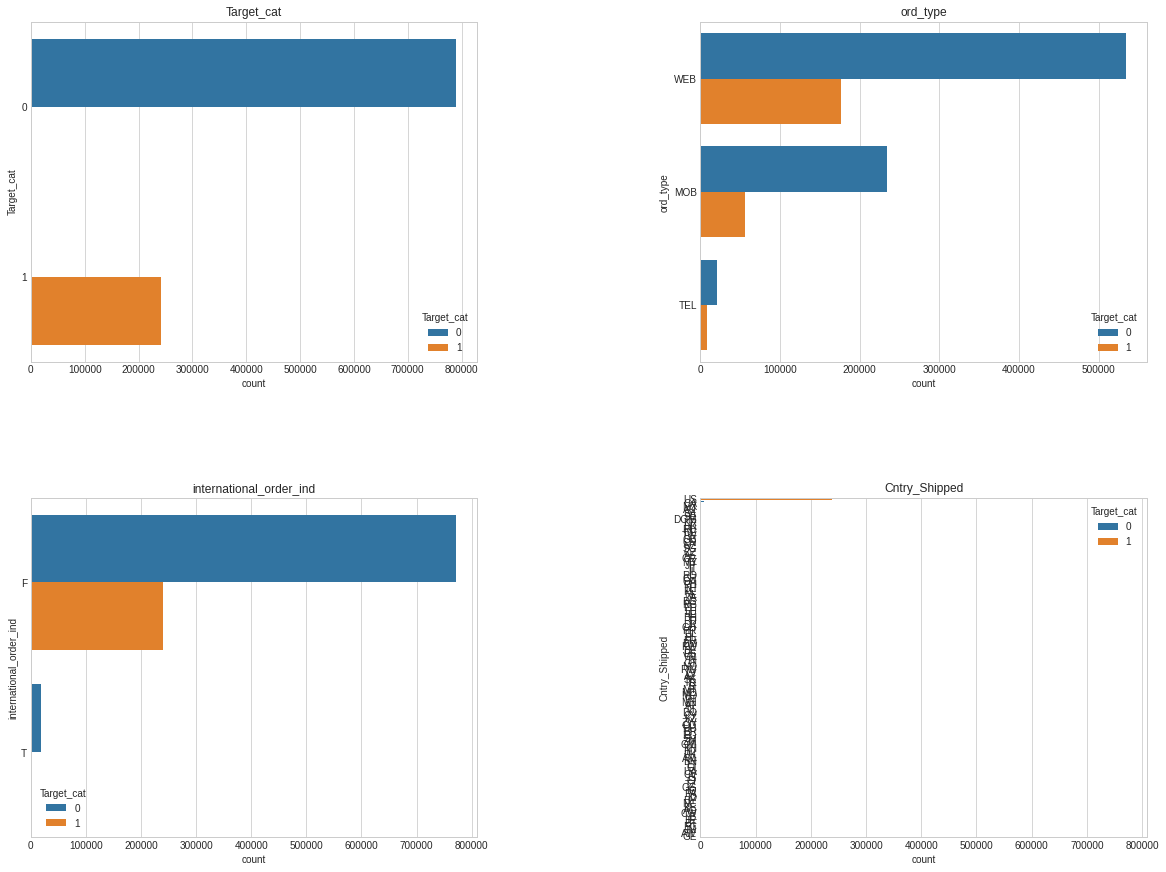

In [125]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df.loc[:, [ 'Target_cat','ord_type', 'international_order_ind', 'Cntry_Shipped']]  

plot_bivariate_bar(bivariate_df, hue='Target_cat', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

**Observation**:
1. There does not seem to be any relation between any specific Country and order cancellation.
2. Cancellations mostly happen for International shipments as the volume of trade is primarily via International Shipments.
3. Web Based orders form the bulk of all orders 
4. The business seems quite healthy as cancellations vs shipped is unbalanced with lesser cancellations as per plot 1 

### Explore Numerical Variables

In [126]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 18 numerical variables

The numerical variables are : ['ord_num', 'ord_line_status', 'cncl_dol', 'rtn_dol', 'dmd_dol', 'dmd_units', 'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind', 'skn_nbr', 'Subcat_ID', 'Cat_ID', 'Dept_id', 'RTN_UNITS', 'cncl_units', 'ord_shp', 'ord_cncl', 'shp_ret']


In [127]:
# view the numerical variables

df[numerical].head()

,ord_num,ord_line_status,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,Fship_Ind,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,ord_shp,ord_cncl,shp_ret
0,7513817.0,0,0.0,0.0,489.58,10.0,0,0,0,9558428,969,76,4,0.0,0.0,29.0,0.0,0.0
1,9009772.0,0,0.0,0.0,559.86,10.0,0,0,0,1121512,903,47,4,0.0,0.0,1.0,0.0,0.0
2,8992959.0,0,0.0,0.0,769.86,10.0,0,0,0,986561,971,46,4,0.0,0.0,1.0,0.0,0.0
3,7090647.0,0,0.0,0.0,279.86,10.0,0,0,0,960251,978,44,4,0.0,0.0,0.0,0.0,0.0
4,7343394.0,0,0.0,0.0,2519.86,10.0,0,0,0,9690716,947,47,4,0.0,0.0,266.0,0.0,0.0


In [128]:
numerical

['ord_num',
 'ord_line_status',
 'cncl_dol',
 'rtn_dol',
 'dmd_dol',
 'dmd_units',
 'Loyalty_Ind',
 'Emp_Ind',
 'Fship_Ind',
 'skn_nbr',
 'Subcat_ID',
 'Cat_ID',
 'Dept_id',
 'RTN_UNITS',
 'cncl_units',
 'ord_shp',
 'ord_cncl',
 'shp_ret']

### Summary of numerical variables


- There are 18 numerical variables. 


- These are given by 

 'ord_num',
 'ord_line_status',
 'cncl_dol',
 'rtn_dol',
 'dmd_dol',
 'dmd_units',
 'Loyalty_Ind',
 'Emp_Ind',
 'Fship_Ind',
 'skn_nbr',
 'Subcat_ID',
 'Cat_ID',
 'Dept_id',
 'RTN_UNITS',
 'cncl_units',
 'ord_shp',
 'ord_cncl',
 'shp_ret'.

### Explore problems within numerical variables



### Missing values in numerical variables

In [129]:
# check missing values in numerical variables

df[numerical].isnull().sum()

ord_num            0
ord_line_status    0
cncl_dol           0
rtn_dol            0
dmd_dol            0
dmd_units          0
Loyalty_Ind        0
Emp_Ind            0
Fship_Ind          0
skn_nbr            0
Subcat_ID          0
Cat_ID             0
Dept_id            0
RTN_UNITS          0
cncl_units         0
ord_shp            0
ord_cncl           0
shp_ret            0
dtype: int64

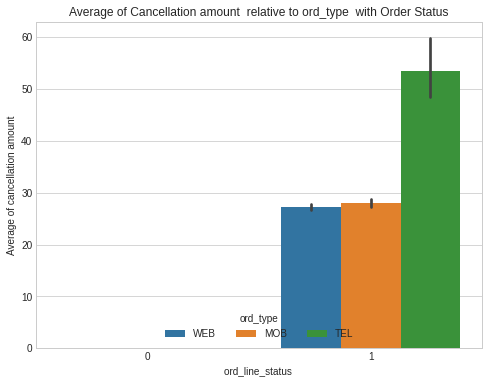

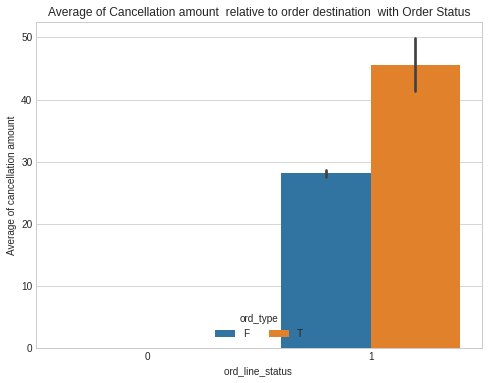

In [130]:
# Clustered Bar Chart 
import seaborn as sb
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'ord_line_status', y = 'cncl_dol',hue='ord_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ord_type')
plt.title('Average of Cancellation amount  relative to ord_type  with Order Status')
plt.xlabel('ord_line_status ')
plt.ylabel('Average of cancellation amount');


plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'ord_line_status', y = 'cncl_dol',hue='international_order_ind')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ord_type')
plt.title('Average of Cancellation amount  relative to order destination  with Order Status')
plt.xlabel('ord_line_status ')
plt.ylabel('Average of cancellation amount');

**Observation**: These figures show that cancellation amount is relatively higher for orders placed via televisions. Similar Inferences were drawn for Return Amount and Shipping AMount

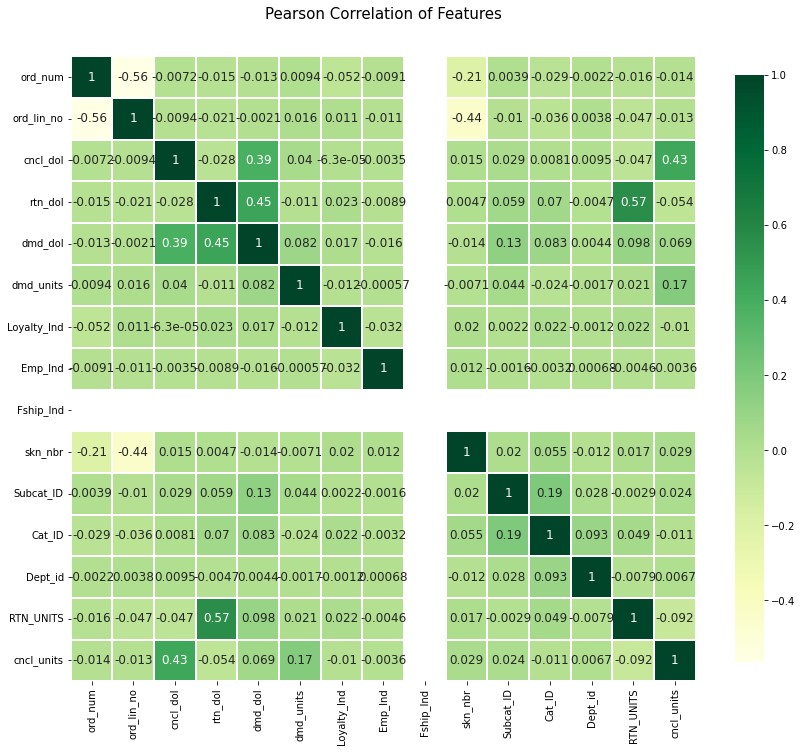

In [18]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [132]:
case_1=df['ord_line_status'].value_counts()[0]
case_2=df['ord_line_status'].value_counts()[1]

total_counts=case_1+case_2
case_1_per=(case_1/total_counts) *100
case_2_per=(case_2/total_counts) *100

([<matplotlib.patches.Wedge at 0x7f0f47b02ed0>,
 [Text(-0.8152701517671257, 0.7384677241678259, 'NO Cancellation'),
  Text(0.8152701171969552, -0.7384677623333757, 'Cancelled or returned')])

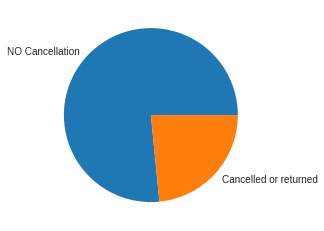

In [133]:
y = np.array([case_1_per,case_2_per])
mylabels = ["NO Cancellation", "Cancelled or returned"]

plt.pie(y, labels = mylabels)

**Observation**: There is a Visible Imbalance in the dataset 

In [134]:
df.shape

(1031008, 22)

In [135]:
df.columns

Index(['ord_num', 'ord_line_status', 'ord_type', 'cncl_dol', 'rtn_dol',
       'dmd_dol', 'dmd_units', 'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind',
       'skn_nbr', 'Subcat_ID', 'Cat_ID', 'Dept_id', 'RTN_UNITS', 'cncl_units',
       'international_order_ind', 'Cntry_Shipped', 'ord_shp', 'ord_cncl',
       'shp_ret', 'Target_cat'],
      dtype='object')

In [136]:
df.drop(['ord_num','Fship_Ind','Target_cat'],axis=1,inplace=True)   #,'Cntry_Shipped'

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>


In [137]:
X = df.drop(['ord_line_status'], axis=1)

y = df['ord_line_status']

In [138]:
# display categorical variables

categorical = [col for col in X.columns if X[col].dtypes == 'O']
#Loyalty Identifier and Employee Identifier are Binary encoded 
categorical.append('Loyalty_Ind')
categorical.append('Emp_Ind')
categorical

['ord_type',
 'international_order_ind',
 'Cntry_Shipped',
 'Loyalty_Ind',
 'Emp_Ind']

In [139]:
X['international_order_ind']=X['international_order_ind'].replace(['F'],0)
X['international_order_ind']=X['international_order_ind'].replace(['T'],1)

In [140]:
# display numerical variables
numerical = [col for col in X.columns if (X[col].dtypes != 'O' and col not in categorical)]
numerical

['cncl_dol',
 'rtn_dol',
 'dmd_dol',
 'dmd_units',
 'skn_nbr',
 'Subcat_ID',
 'Cat_ID',
 'Dept_id',
 'RTN_UNITS',
 'cncl_units',
 'ord_shp',
 'ord_cncl',
 'shp_ret']

In [141]:
import numpy as np
for col in categorical:
  X[col]= X[col].replace({np.NaN: 'Unknown'})
X[categorical]

,ord_type,international_order_ind,Cntry_Shipped,Loyalty_Ind,Emp_Ind
0,WEB,0,US,0,0
1,MOB,0,US,0,0
2,MOB,0,US,0,0
3,WEB,0,US,0,0
4,WEB,0,US,0,0
...,...,...,...,...,...
1048570,WEB,0,US,0,0
1048571,WEB,0,US,0,0
1048572,MOB,0,US,0,0
1048573,WEB,0,US,0,0


# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>


In [151]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [152]:
X_train

,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,Cntry_Shipped,ord_shp,ord_cncl,shp_ret
118646,WEB,0.00,149.99,2099.86,10.0,0,0,1085486,968,46,4,1.0,0.0,0,US,121.0,0.0,18.0
515302,WEB,0.00,0.00,629.86,10.0,0,0,956694,842,47,4,0.0,0.0,0,US,0.0,0.0,0.0
239378,WEB,0.00,47.99,671.86,10.0,0,0,9847164,825,46,4,1.0,0.0,0,US,1.0,0.0,446.0
357432,WEB,149.99,0.00,2099.86,10.0,0,0,9852284,947,47,4,0.0,1.0,0,US,0.0,1.0,0.0
155674,WEB,0.00,0.00,699.86,10.0,0,0,9717232,960,48,4,0.0,0.0,0,US,30.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263532,WEB,0.00,0.00,671.86,10.0,1,0,9814198,832,46,4,0.0,0.0,0,US,60.0,0.0,0.0
372074,MOB,0.00,0.00,770.00,10.0,0,0,1093827,818,49,4,0.0,0.0,0,US,1.0,0.0,0.0
134189,WEB,0.00,0.00,839.86,10.0,0,0,9836432,832,46,4,0.0,0.0,0,US,29.0,0.0,0.0
682588,MOB,0.00,229.99,3219.86,10.0,0,0,1068451,957,47,4,1.0,0.0,0,US,30.0,0.0,100.0


In [153]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((824806, 18), (206202, 18))

# **10. Feature Engineering** <a class="anchor" id="10"></a>



**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

### Encode categorical variables

In [154]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
categorical

['ord_type',
 'international_order_ind',
 'Cntry_Shipped',
 'Loyalty_Ind',
 'Emp_Ind']

In [156]:
X_train

,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,Cntry_Shipped,ord_shp,ord_cncl,shp_ret
118646,WEB,0.00,149.99,2099.86,10.0,0,0,1085486,968,46,4,1.0,0.0,0,US,121.0,0.0,18.0
515302,WEB,0.00,0.00,629.86,10.0,0,0,956694,842,47,4,0.0,0.0,0,US,0.0,0.0,0.0
239378,WEB,0.00,47.99,671.86,10.0,0,0,9847164,825,46,4,1.0,0.0,0,US,1.0,0.0,446.0
357432,WEB,149.99,0.00,2099.86,10.0,0,0,9852284,947,47,4,0.0,1.0,0,US,0.0,1.0,0.0
155674,WEB,0.00,0.00,699.86,10.0,0,0,9717232,960,48,4,0.0,0.0,0,US,30.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263532,WEB,0.00,0.00,671.86,10.0,1,0,9814198,832,46,4,0.0,0.0,0,US,60.0,0.0,0.0
372074,MOB,0.00,0.00,770.00,10.0,0,0,1093827,818,49,4,0.0,0.0,0,US,1.0,0.0,0.0
134189,WEB,0.00,0.00,839.86,10.0,0,0,9836432,832,46,4,0.0,0.0,0,US,29.0,0.0,0.0
682588,MOB,0.00,229.99,3219.86,10.0,0,0,1068451,957,47,4,1.0,0.0,0,US,30.0,0.0,100.0


In [157]:
# encode remaining variables with one-hot encoding
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['ord_type','Cntry_Shipped'])    #rest are already label encoded



X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


As a final check, I will check for missing values in X_train and X_test.

In [158]:
# check missing values in X_train

X_train.isnull().sum()

ord_type_1           0
ord_type_2           0
ord_type_3           0
cncl_dol             0
rtn_dol              0
                    ..
Cntry_Shipped_101    0
Cntry_Shipped_102    0
ord_shp              0
ord_cncl             0
shp_ret              0
Length: 121, dtype: int64

In [159]:
# check missing values in X_test

X_test.isnull().sum()

ord_type_1           0
ord_type_2           0
ord_type_3           0
cncl_dol             0
rtn_dol              0
                    ..
Cntry_Shipped_101    0
Cntry_Shipped_102    0
ord_shp              0
ord_cncl             0
shp_ret              0
Length: 121, dtype: int64

**Observation**:We can see that there are no missing values in X_train and X_test.

In [160]:
X_train.shape

(824806, 121)

We can see that from the initial 22 columns, we now have 121 columns.

Similarly, I will take a look at the `X_test` set.

In [161]:
X_test.head()

,ord_type_1,ord_type_2,ord_type_3,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,skn_nbr,...,Cntry_Shipped_96,Cntry_Shipped_97,Cntry_Shipped_98,Cntry_Shipped_99,Cntry_Shipped_100,Cntry_Shipped_101,Cntry_Shipped_102,ord_shp,ord_cncl,shp_ret
137777,1,0,0,0.00,0.00,349.86,10.0,0,0,9862557,...,0,0,0,0,0,0,0,1.0,0.0,0.0
341664,1,0,0,0.00,59.99,839.86,10.0,0,0,959382,...,0,0,0,0,0,0,0,1.0,0.0,48.0
592209,0,1,0,0.00,0.00,1119.86,10.0,0,0,1050577,...,0,0,0,0,0,0,0,0.0,0.0,0.0
763725,1,0,0,23.98,0.00,335.72,10.0,0,0,9705141,...,0,0,0,0,0,0,0,0.0,1.0,0.0
813444,0,1,0,0.00,0.00,2799.86,10.0,0,0,1059335,...,0,0,0,0,0,0,0,30.0,0.0,0.0


In [162]:
X_test.shape

(206202, 121)

**Observation**: We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **11. Feature Scaling** <a class="anchor" id="11"></a>



In [163]:
numerical

['cncl_dol',
 'rtn_dol',
 'dmd_dol',
 'dmd_units',
 'skn_nbr',
 'Subcat_ID',
 'Cat_ID',
 'Dept_id',
 'RTN_UNITS',
 'cncl_units',
 'ord_shp',
 'ord_cncl',
 'shp_ret']

In [164]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['cncl_dol',
 'rtn_dol',
 'dmd_dol',
 'dmd_units',
 'skn_nbr',
 'Subcat_ID',
 'Cat_ID',
 'Dept_id',
 'RTN_UNITS',
 'cncl_units',
 'ord_shp',
 'ord_cncl',
 'shp_ret']

scaler = MinMaxScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical]=scaler.fit_transform(X_test[numerical])

In [165]:
X_train

,ord_type_1,ord_type_2,ord_type_3,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,skn_nbr,...,Cntry_Shipped_96,Cntry_Shipped_97,Cntry_Shipped_98,Cntry_Shipped_99,Cntry_Shipped_100,Cntry_Shipped_101,Cntry_Shipped_102,ord_shp,ord_cncl,shp_ret
118646,1,0,0,0.00000,0.011029,0.005230,0.015152,0,0,0.113547,...,0,0,0,0,0,0,0,0.359050,0.000000,0.026049
515302,1,0,0,0.00000,0.000000,0.001569,0.015152,0,0,0.100660,...,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
239378,1,0,0,0.00000,0.003529,0.001673,0.015152,0,0,0.990213,...,0,0,0,0,0,0,0,0.002967,0.000000,0.645441
357432,1,0,0,0.00523,0.000000,0.005230,0.015152,0,0,0.990725,...,0,0,0,0,0,0,0,0.000000,0.002439,0.000000
155674,1,0,0,0.00000,0.000000,0.001743,0.015152,0,0,0.977212,...,0,0,0,0,0,0,0,0.089021,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263532,1,0,0,0.00000,0.000000,0.001673,0.015152,1,0,0.986914,...,0,0,0,0,0,0,0,0.178042,0.000000,0.000000
372074,0,1,0,0.00000,0.000000,0.001918,0.015152,0,0,0.114381,...,0,0,0,0,0,0,0,0.002967,0.000000,0.000000
134189,1,0,0,0.00000,0.000000,0.002092,0.015152,0,0,0.989139,...,0,0,0,0,0,0,0,0.086053,0.000000,0.000000
682588,0,1,0,0.00000,0.016911,0.008019,0.015152,0,0,0.111842,...,0,0,0,0,0,0,0,0.089021,0.000000,0.144718


We now have `X_train` dataset ready to be fed into the Random Forest classifier. I will do it as follows.

In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824806 entries, 118646 to 124052
Columns: 121 entries, ord_type_1 to shp_ret
dtypes: float64(13), int64(108)
memory usage: 767.7 MB


# **12. Model training** <a class="anchor" id="12"></a>


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=2,criterion='entropy', max_depth=2,class_weight={0:1,1:4}, min_samples_split=25000,n_jobs=-1)

clf.fit(X_train, y_train)
print ("Classifier:", clf)
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Classifier: RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=2, min_samples_split=25000, n_estimators=2,
                       n_jobs=-1)
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    157787
           1       1.00      0.77      0.87     48415

    accuracy                           0.95    206202
   macro avg       0.97      0.89      0.92    206202
weighted avg       0.95      0.95      0.94    206202



# **13. Predict the results** <a class="anchor" id="13"></a>



In [178]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

# **14. Check accuracy score** <a class="anchor" id="14"></a>


In [179]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9469


### Compare the train-set and test-set accuracy



In [181]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 0, 1, 0])

In [182]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9468


### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    157787
           1       1.00      0.77      0.87     48415

    accuracy                           0.95    206202
   macro avg       0.97      0.89      0.92    206202
weighted avg       0.95      0.95      0.94    206202



Base line model shows robust performance on both Train and test Signifying that pre-processing and feature wrangling has been done properly .



### Check for overfitting and underfitting

In [184]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9468
Test set score: 0.9469


# **18. ROC - AUC** <a class="anchor" id="18"></a>


### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



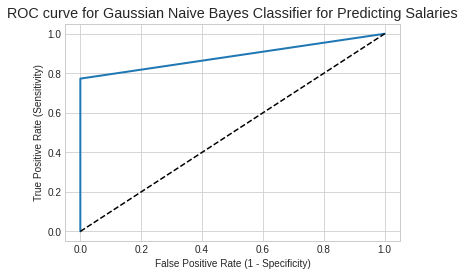

In [186]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train.to_numpy(dtype=int), clf.predict(X_train))

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [187]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8868


### Interpretation


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [189]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7640


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>


In [191]:
# Applying 10-Fold Cross Validation
import sklearn
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.4538621  0.2580958  0.99972115 0.99305295 0.94715147 0.99265285
 0.9478904  0.94607177 0.93220175 0.99331959]


We can summarize the cross-validation accuracy by calculating its mean.

In [192]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8464


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 84.64 % accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 25% accuracy to 99.33 % accuracy. So, we can conclude that the model is not independent of the particular folds used for training.

- Our original model accuracy is 0.9973, but the mean cross-validation accuracy is 0.9994. So, the 10-fold cross-validation accuracy shows robustness of the model 



```
### 
**Hyperparameter Tuning and decision bounadary Analysis **
```



In [215]:
# parameters of RandomForest (max_depth,n_estimators)
parameters=np.array([[2,1],[2,10],[2,100],[5,1],[5,10],[5,100],[15,1],[15,10],[15,100]])

# init
models=[]
train_scores=[]
test_scores=[]

In [194]:
#Grid Search N_estimators , max_depth 
#train the model for each instance of the parameter 

for params in parameters:    
    # train
    forest = RandomForestClassifier(max_depth = params[0], n_estimators = params[1], random_state = 42)    
    model = forest.fit(X_train, y_train)
    # save the model and the scores
    train_score = accuracy_score(y_train,model.predict(X_train))
    test_score = accuracy_score(y_test,model.predict(X_test))
    models.append(model)
    train_scores.append(train_score)
    test_scores.append(test_score)
    # print scores
    print("max_depth={} \t n_estimators={} \t train_score={:.4f} \t test_score={:.4f}".format(params[0],params[1],train_score,test_score))

max_depth=2 	 n_estimators=1 	 train_score=0.9929 	 test_score=0.9926
max_depth=2 	 n_estimators=10 	 train_score=0.9912 	 test_score=0.9907
max_depth=2 	 n_estimators=100 	 train_score=0.9400 	 test_score=0.9398
max_depth=5 	 n_estimators=1 	 train_score=0.9929 	 test_score=0.9927
max_depth=5 	 n_estimators=10 	 train_score=0.9994 	 test_score=0.9996
max_depth=5 	 n_estimators=100 	 train_score=0.9998 	 test_score=0.9997
max_depth=15 	 n_estimators=1 	 train_score=0.9990 	 test_score=0.9987
max_depth=15 	 n_estimators=10 	 train_score=1.0000 	 test_score=0.9998
max_depth=15 	 n_estimators=100 	 train_score=0.9999 	 test_score=0.9998


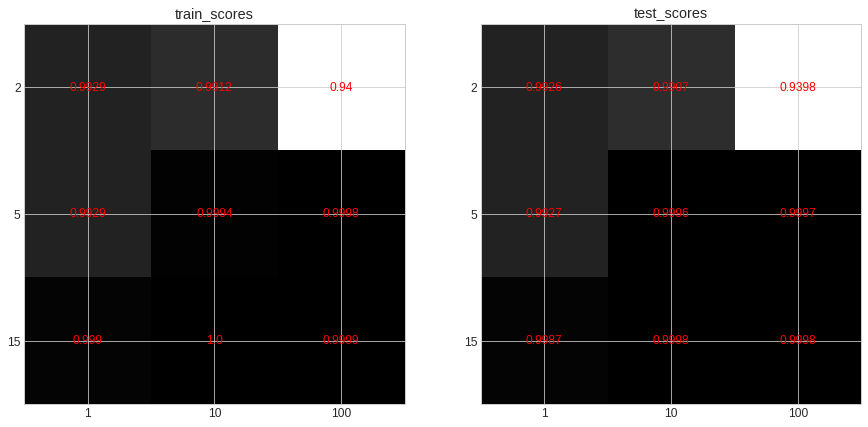

In [195]:
max_depth = np.unique(parameters[:,0])
n_estimators  = np.unique(parameters[:,1])
train_scores_2d = np.around(np.array(train_scores).reshape(3,3),decimals=4)
test_scores_2d =  np.around(np.array(test_scores).reshape(3,3),decimals=4)

def plot_heap_map(X,x_params,y_params,title,ax):
    #fig, ax = plt.subplots()
    im = ax.imshow(X)
    ax.set_xticks(np.arange(len(x_params)))
    ax.set_yticks(np.arange(len(y_params)))
    ax.set_xticklabels(x_params)
    ax.set_yticklabels(y_params)
    for i in range(len(x_params)):
        for j in range(len(y_params)):
            text = ax.text(j, i, X[i, j],
                           ha="center", va="center", color="r")
    ax.set_title(title)
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
plot_heap_map(train_scores_2d,n_estimators,max_depth,'train_scores',axes[0])
plot_heap_map(test_scores_2d,n_estimators,max_depth,'test_scores',axes[1])
plt.show()

### Will Choose N_estimators=100 and max_depth=2 as it was the fastest
Even though it has least accuracy say **0.94** but it is decent so lets try to see if using Cross validation it improves 

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=2,class_weight={0:1,1:4}, min_samples_split=25000,n_jobs=-1)

clf.fit(X_train, y_train)
print ("Classifier:", clf)
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Classifier: RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=2, min_samples_split=25000, n_jobs=-1)
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    157787
           1       1.00      0.97      0.98     48415

    accuracy                           0.99    206202
   macro avg       1.00      0.98      0.99    206202
weighted avg       0.99      0.99      0.99    206202



### It Worked !!!!

In [222]:
# Applying 10-Fold Cross Validation
import sklearn
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.99981814 0.99978177 0.99972115 0.9990422  0.99972115 0.99970902
 0.99983026 0.99973327 0.99220417 0.99939379]


In [223]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9989


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 84.64 % accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively low variance in the accuracy between folds, ranging from 99.70% accuracy to 99.98 % accuracy. So, we can conclude that the model is  independent of the particular folds used for training.

- Our original model accuracy is 84.64, but the mean cross-validation accuracy is 99.89. So, the 10-fold cross-validation accuracy shows robustness of the model 

Case 1: Order Cancelled

Less Error. There is very less true negative scenarios in both train and test. Hence the model is stable.
False Negative and False positive rate is very low, model prediction is very accurate and reliable.

Case 2: Order Not Cancelled
Less Error. Since this is a majorly populated class, it is dominating the imbalance amongst classes.
With hyper tuning we were able to accurately predict the order cancellation and not cancel.